In [10]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def trans2hls(image):
    img_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    (h,l,s) = cv2.split(img_hls)
    return s

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    

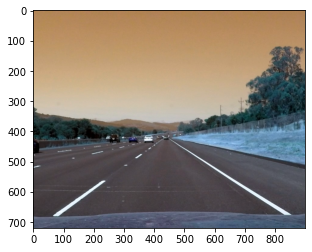

In [3]:
img=cv2.imread(r"Assets\Project_data\test_images\straight_lines2.jpg")
plt.imshow(img[:,200:1100])
img=img[:,200:1100]

In [4]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# darkened = adjust_gamma(gray,0.2)
# blurred = gaussian_blur(darkened,5)
# edges = cv2.Canny(blurred,100,200)
# lines =cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=10,maxLineGap=200)
# for line in lines:
#     x1,y1,x2,y2 = line[0]
#     cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)


In [5]:
# cv2.imshow('edges image', edges)
# cv2.imshow(' image', img)
# cv2.imshow('darkened image', darkened)
# cv2.imshow('blurred image', blurred)





# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [15]:
cap = cv2.VideoCapture(r"Assets\Project_data\project_video.mp4")

In [16]:
count = 0
while cap.isOpened():
    ret,frame = cap.read()
    if not ret:
        break
        

    count = count + 1
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    darkened = adjust_gamma(gray,0.2)
    blurred = gaussian_blur(darkened,5)
    edges = cv2.Canny(blurred,100,200)
    lines =cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=10,maxLineGap=200)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(frame,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('window-name', frame)
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()

TypeError: 'NoneType' object is not iterable